<a href="https://colab.research.google.com/github/Nadeem-Anwar/Nadeem-Anwar/blob/main/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#To mount google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

source = '/content/drive/MyDrive/BreaKHis_v1/histology_slides/breast'
destination = '/content/sample_data'

try:
  os.mkdir(destination + '/BreaKHis_v1')
  os.mkdir(destination + '/BreaKHis_v1/benign')         #all benign images
  os.mkdir(destination + '/BreaKHis_v1/malignant')      #all malignant images
except FileExistsError:
  print('Destination folders already exist')

In [4]:
import cv2
from matplotlib import pyplot

benignList = []
benignName = []
malignantList = []
malignantName = []
bCount = 0
mCount = 0
flag = 0

os.chdir(source)
for d in os.listdir():      #to access either of benign or malignant
  if d == 'benign':
    os.chdir(d)
    data = benignList
    name = benignName
    flag = 0
  elif d == 'malignant':
    os.chdir(d)
    data = malignantList
    name = malignantName
    flag = 1
  else:
    continue

  for dd in os.listdir():      #to access SOB folder 
    if dd == 'SOB':
      os.chdir(dd)
      os.getcwd()
    else:
      continue

    for typeDir in os.listdir(): #to access various type sample folder
      os.chdir(typeDir)

      for patientDir in os.listdir():#to access each of patient directories
        os.chdir(patientDir)

        for x in os.listdir():        #to access 400X images only
          if x == '400X':
            os.chdir(x)
            print('******', os.getcwd() , 'has now been read.******')

            for f in os.listdir():      #to read each image
              file = os.getcwd() + '/' + f
              im = cv2.imread(file)
              data.append(im)
              name.append(f)
              if flag == 0:
                bCount = bCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/benign/' + f, im)
              elif flag == 1:
                mCount = mCount + 1
                pyplot.imsave(destination + '/BreaKHis_v1/malignant/' + f, im)

            os.chdir(os.pardir)
            break
          else:
            continue
          os.chdir(os.pardir)
          break   #to be removed later, breaks are used to play with small sample
        os.chdir(os.pardir)
        break   #to be removed later
      os.chdir(os.pardir)
      break   #to be removed later
    os.chdir(os.pardir)
  os.chdir(os.pardir)

print('benign images    = ' + str(bCount))
print('malignant images = ' + str(mCount))

****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-11951/400X has now been read.******
****** /content/drive/MyDrive/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/400X has now been read.******
benign images    = 30
malignant images = 20


In [5]:
from sklearn.model_selection import train_test_split
Bx_train, Bx_test, Bname_train, Bname_test = train_test_split(benignList, benignName, test_size = 0.2, random_state = 1)
Mx_train, Mx_test, Mname_train, Mname_test = train_test_split(malignantList, malignantName, test_size = 0.2, random_state = 1)

In [6]:
#folders for train test splitted data
try:
  os.mkdir(destination + '/BreaKHis_v1/train')
  os.mkdir(destination + '/BreaKHis_v1/train/benign')
  os.mkdir(destination + '/BreaKHis_v1/train/malignant')
  os.mkdir(destination + '/BreaKHis_v1/test')
  os.mkdir(destination + '/BreaKHis_v1/test/benign')
  os.mkdir(destination + '/BreaKHis_v1/test/malignant')
except FileExistsError:
  print('Destination folders already exist')

In [7]:
#To write/save images in given folder path
def imgSave(images, name, path):
  i = 0
  for img in images:
    pyplot.imsave(path + name[i], img)
    i = i + 1
  return i

Bx_trainCount = imgSave(Bx_train, Bname_train, destination + '/BreaKHis_v1/train/benign/')
Mx_trainCount = imgSave(Mx_train, Mname_train, destination + '/BreaKHis_v1/train/malignant/')
Bx_testCount = imgSave(Bx_test, Bname_test, destination + '/BreaKHis_v1/test/benign/')
Mx_testCount = imgSave(Mx_test, Mname_test, destination + '/BreaKHis_v1/test/malignant/')

print('TRAIN set: benign = ' + str(Bx_trainCount), ', malignant = ' + str(Mx_trainCount))
print('TEST  set: benign = ' + str(Bx_testCount),  ', malignant = ' + str(Mx_testCount))

TRAIN set: benign = 24 malignant = 16
TEST set : benign = 6 malignant = 4


In [9]:
#label set for each of train test set
By_train = [0 for i in range(Bx_trainCount)]
By_test = [0 for i in range(Bx_testCount)]

My_train = [0 for i in range(Mx_trainCount)]
My_test = [0 for i in range(Mx_testCount)]

In [10]:
# Histogram Equalization (Contrast Enhancing) : Image Preprocessing
# https://medium.com/analytics-vidhya/image-equalization-contrast-enhancing-in-python-82600d3b371c
img = Mx_train[10]
imgc = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r_image, g_image, b_image = cv2.split(imgc)

r_image_eq = cv2.equalizeHist(r_image)
g_image_eq = cv2.equalizeHist(g_image)
b_image_eq = cv2.equalizeHist(b_image)

imgc_eq = cv2.merge((r_image_eq, g_image_eq, b_image_eq))
cmap_val = None

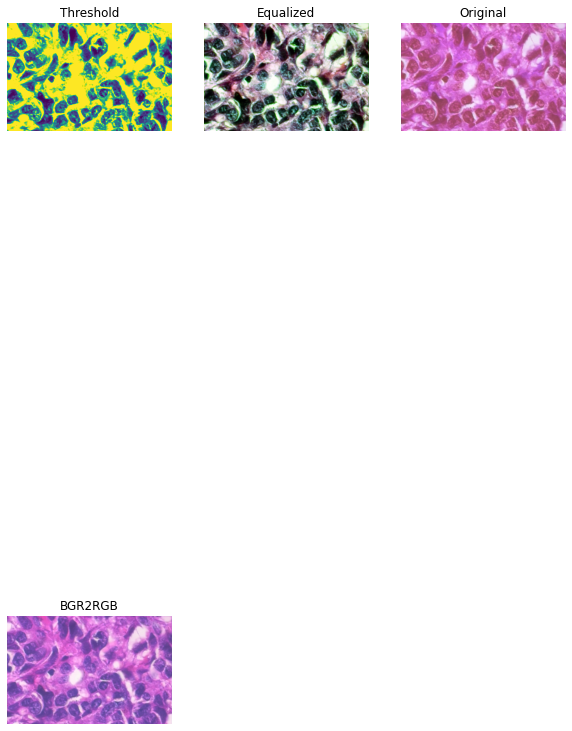

In [23]:
imgg = cv2.cvtColor(imgc_eq, cv2.COLOR_RGB2GRAY)
ret, thresh_hold = cv2.threshold(imgg, 160, 255, cv2.THRESH_TRUNC)

fig = pyplot.figure(figsize=(10, 20))

ax1 = fig.add_subplot(2, 3, 3)
ax1.axis("off")
ax1.title.set_text('Original')
ax2 = fig.add_subplot(2, 3, 4)
ax2.axis("off")
ax2.title.set_text("BGR2RGB")

ax3 = fig.add_subplot(2, 3, 2)
ax3.axis("off")
ax3.title.set_text("Equalized")

ax4 = fig.add_subplot(2, 3, 1)
ax4.axis("off")
ax4.title.set_text("Threshold")

ax1.imshow(img, cmap=cmap_val)
ax2.imshow(imgc, cmap=cmap_val)
ax3.imshow(imgc_eq, cmap=cmap_val)
ax4.imshow(thresh_hold, cmap=cmap_val)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(Bx_train, By_train)
y_pred = classifier_knn.predict(Bx_test)
print(y_pred)

# Finding accuracy by comparing actual response values(y_test)with predicted response value(y_pred)
print("Accuracy:", metrics.accuracy_score(By_test, y_pred))